# Exploratory Data Analysis for EDI Trend

- Possible Problem Statement(TBD)
Identify industries and companies likely to receive subsidies and explore the correlation between private equity and the hindrance of sustainable economic development in the local community. By analyzing the trend of Economic Development Incentives (EDIs), we seek to understand the relationship between private equity and subsidy trends.


# Data Description
`state` char(2)\
`program` varchar(150)\
`subsidy_type` varchar(100)\
`agency varchar`(150)\
`sub_year varchar`(20)\
`company varchar`(150)\
`city` varchar(100)\
`county` varchar(100)\
`street_address` varchar(150)\
`zip` varchar(15)\
`major_industry` varchar(150)\
`industry` varchar(150)\
`description` text\
`naics` varchar(100)\
`jobs_data` varchar(150)\
`wage_data` varchar(150)\
`wage_data_type` varchar(150)\
`investment_data` varchar(150)\
`exempted_value` integer\
`info_source` text\
`notes` text\
`subsidy` bigint(20)\
`subsidy_adjusted` bigint(20)\
`megadeal_contrib` bigint(20)\
`subsidy_display` varchar(30)\
`parent_name` varchar(150)\
`unique_id` bigint(20)\
`load_day` varchar(8)\
`subsidy_level` varchar(10)\
`cfda_program_num` varchar(20)\
`face_loan` bigint(20)\
`principal_place_state_code` varchar(20)\
`principal_place_code` varchar(20)\
`principal_place_cc` varchar(100)\
`principal_place_zip` varchar(11)\
`unique_transaction_id` varchar(50)\
`duns` varchar(20)\
`last_mod_date` varchar(20)


# 2.1 Library set-up

In [ ]:
# library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from datetime import datetime

In [ ]:
#Loading the csv data
dec_basic='/content/drive/Shareddrives/Incentive Research/CSV files/subsidy_tracker_2023dec06_basic.csv'
jun_basic='/content/drive/Shareddrives/Incentive Research/CSV files/subsidy_tracker_jun2023_basic.csv'
sep_basic='/content/drive/Shareddrives/Incentive Research/CSV files/subsidy_tracker_sep2023_basic.csv'
fortune_500='/content/drive/Shareddrives/Incentive Research/CSV files/Fortune 500.csv'

In [ ]:
# data import
dec_basic_df = pd.read_csv(dec_basic)
fortune_500_df = pd.read_csv(fortune_500)

<ipython-input-5-5253f0345a13>:2: DtypeWarning: Columns (4,6,7,8,9,12,13,14,15,16,17,20,31,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  dec_basic_df = pd.read_csv(dec_basic)


In [ ]:
dec_basic_df.head()

,state,program,subsidy_type,agency,sub_year,company,city,county,street_address,zip,...,subsidy_level,cfda_program_num,face_loan,principal_place_state_code,principal_place_code,principal_place_cc,principal_place_zip,unique_transaction_id,duns,last_mod_date
0,AK,Development Finance Program,infrastructure assistance,Alaska Industrial Development and Export Autho...,1989.0,Alaska Ship and Drydock,Ketchikan,NaN,NaN,NaN,...,state,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,Development Finance Program,infrastructure assistance,Alaska Industrial Development and Export Autho...,1990.0,Red Dog Mine,Kivalina,NaN,NaN,NaN,...,state,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,Development Finance Program,infrastructure assistance,Alaska Industrial Development and Export Autho...,1990.0,Capstone Mining Corp.,Skagway,NaN,NaN,NaN,...,state,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,Development Finance Program,infrastructure assistance,Alaska Industrial Development and Export Autho...,1991.0,Golden Valley Electric Assocation,Healy,NaN,NaN,NaN,...,state,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,Development Finance Program,infrastructure assistance,Alaska Industrial Development and Export Autho...,1995.0,Federal Express,Anchorage,NaN,NaN,NaN,...,state,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
s = dec_basic_df['state'].value_counts().sort_values(ascending=False).head(10)
s = s[s.index != 'US']
s
#US is not defined but belong to US, US is removed for now

NY    148199
WA     32310
CO     29244
MI     23014
CA     22156
PA     16873
NC     16629
TN     15744
NJ     15007
Name: state, dtype: int64

# 2.2 State & Subsidy


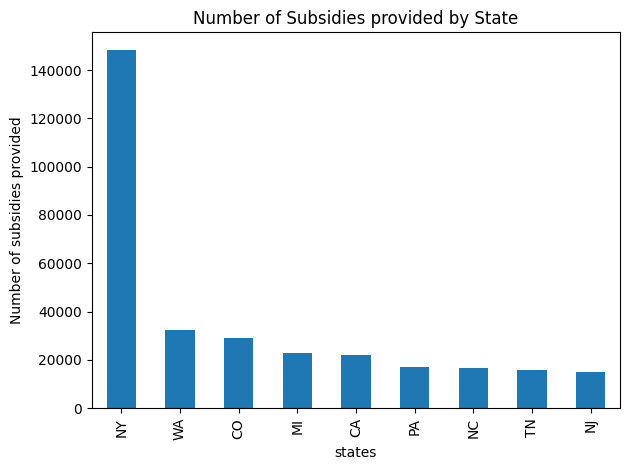

In [ ]:
#visualization
s.plot.bar()
plt.xlabel("states")
plt.ylabel("Number of subsidies provided")
plt.title("Number of Subsidies provided by State")
plt.tight_layout()
plt.margins(0.05)

In [ ]:
s2 = dec_basic_df.groupby("state")["subsidy"].mean().sort_values(ascending=False).head(10)
s2 = s2[s2.index != 'US']
s2

state
GA    5.177300e+06
AK    5.056525e+06
LA    4.425051e+06
SC    3.930621e+06
MS    2.980905e+06
NV    2.558145e+06
WI    2.554663e+06
TX    2.210151e+06
NM    2.024483e+06
MO    1.539567e+06
Name: subsidy, dtype: float64

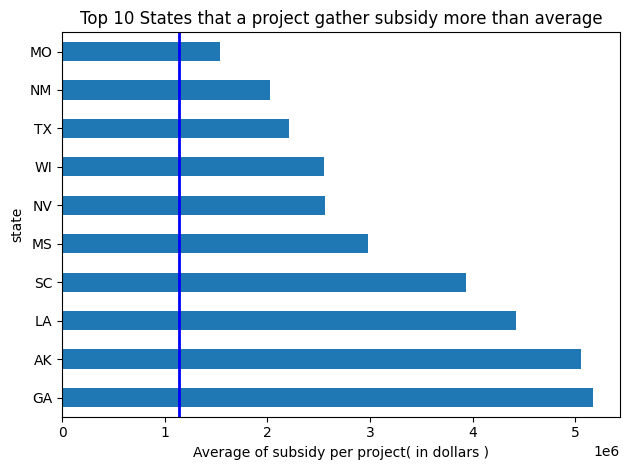

In [ ]:
s2.plot.barh()
plt.xlabel("Average of subsidy per project( in dollars )")
plt.ylabel("state")
plt.axvline(dec_basic_df.groupby("state")["subsidy"].mean().mean(), color = "blue", linewidth = 2 )
plt.title("Top 10 States that a project gather subsidy more than average")
plt.tight_layout()
plt.margins(0.05)

#2.3 Statistics

In [ ]:
# maximum, minimum, mean, median, 25th and 75th percentiles
mean = np.mean(dec_basic_df["subsidy"].dropna())
median = np.median(dec_basic_df["subsidy"].dropna())
percentiles = np.percentile(dec_basic_df["subsidy"].dropna(), [25,75])
minimum = dec_basic_df["subsidy"].dropna().min()
maximum = dec_basic_df["subsidy"].dropna().max()
print("Mean donation amount is: ", np.round(mean,2))
print("Median donation amount is ", median)
print("25th and 75th percentiles are: ", percentiles)
print("Minimum and maximum donation amounts are :", minimum, "    ",maximum)

Mean donation amount is:  687103.66
Median donation amount is  7367.0
25th and 75th percentiles are:  [    0. 65200.]
Minimum and maximum donation amounts are : 0      8700000000


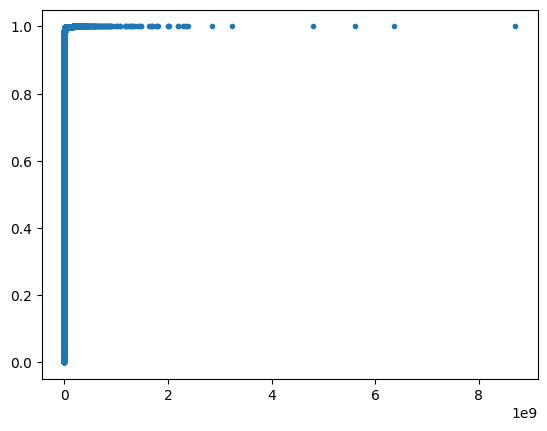

In [ ]:
#Empirical Cumulative Distribution Function(ECDF) of "subsidy" column.
#visualize the existence of outliers
x = np.sort(dec_basic_df["subsidy"].dropna())
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x,y,marker = ".", linestyle = "none")

#2.4 Company & Subsidy

In [ ]:
s3 = dec_basic_df.groupby("company")["subsidy"].sum().sort_values(ascending = False).head(15)
s3

company
Boeing                                    13599470749
Intel                                      8134518734
Micron Technology                          6484000000
General Motors                             6040514060
Alcoa                                      5668800000
Ford Motor                                 5567536000
Foxconn                                    4792562024
Lake Charles LNG Export Company, LLC       3107800000
Cameron LNG, LLC                           3074822591
Texas Instruments                          3042065157
FEWI Development Corporation (Foxconn)     2850000000
Tesla Motors                               2721407993
Sabine Pass Liquefaction, LLC              2626811897
Amazon.com                                 2272914858
Sempra Energy                              2194868648
Name: subsidy, dtype: int64

In [ ]:
s4 = dec_basic_df["state"].value_counts()
s5 = dec_basic_df.groupby("state")["subsidy"].sum()
df = pd.concat([s4,s5], axis = 1, keys = ["Company", "Subsidy"])
df = df[df.index != 'US']
df.head(10)

,Company,Subsidy
NY,148199,58428794947
WA,32310,18409134556
CO,29244,2201069997
MI,23014,27153311653
CA,22156,7446839508
PA,16873,5903520505
NC,16629,15316749708
TN,15744,6332513471
NJ,15007,14615558766
OK,14896,7668907870


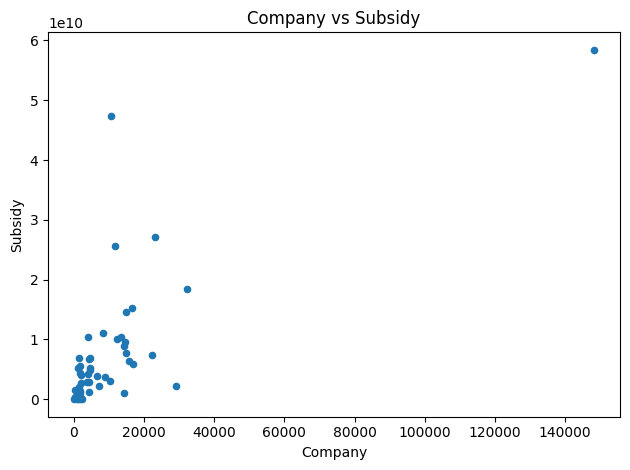

In [ ]:
df.plot.scatter(x = "Company", y = "Subsidy")
plt.title("Company vs Subsidy")
plt.tight_layout()
plt.margins(0.05)

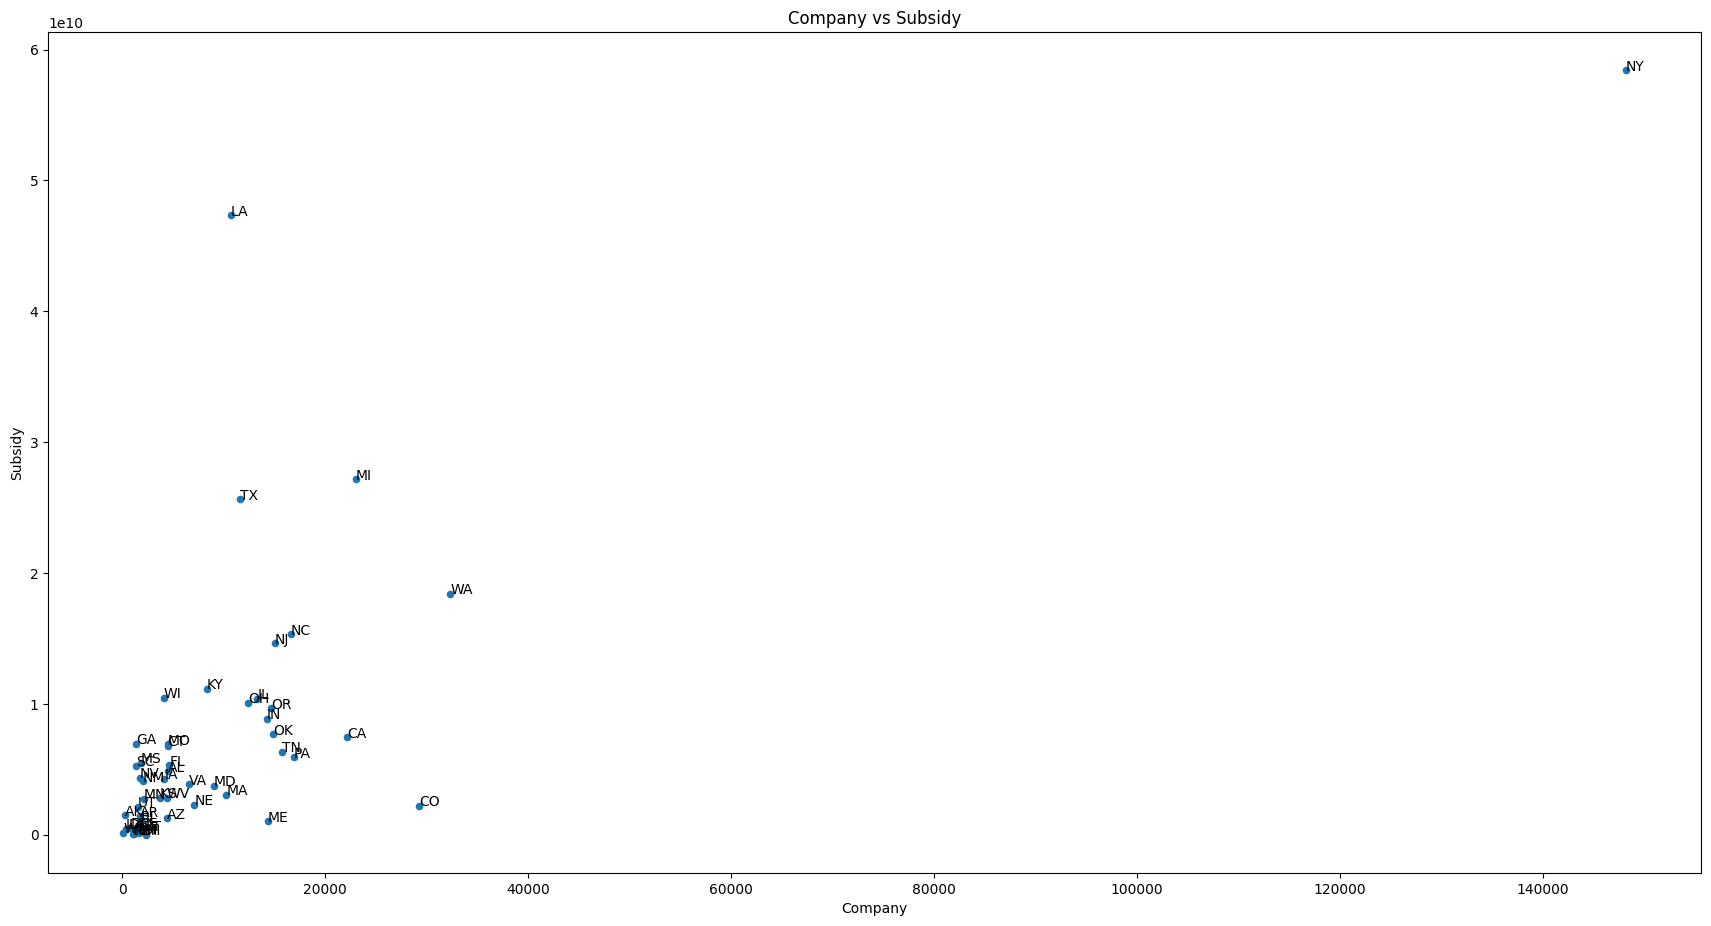

In [ ]:
df.plot.scatter(x = "Company", y = "Subsidy")
plt.title("Company vs Subsidy")
for i, j in enumerate(df.index):
    plt.annotate(j,(df.Company[i], df.Subsidy[i]))
plt.tight_layout()
plt.margins(0.05)

## to increase figure size :
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

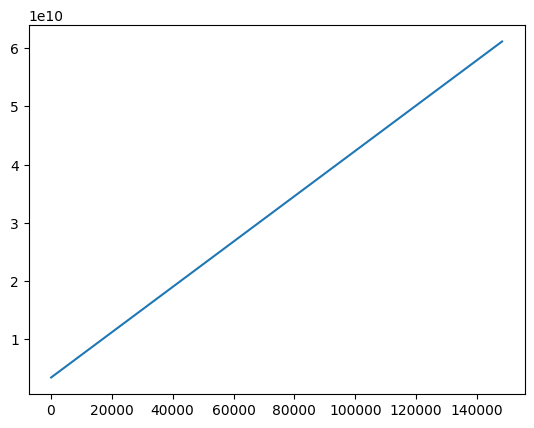

In [ ]:
slope, intercept = np.polyfit(df.Company, df.Subsidy, 1)
x = np.array([df.Company.min(), df.Company.max()])
y =  slope * x + intercept
plt.plot(x,y)

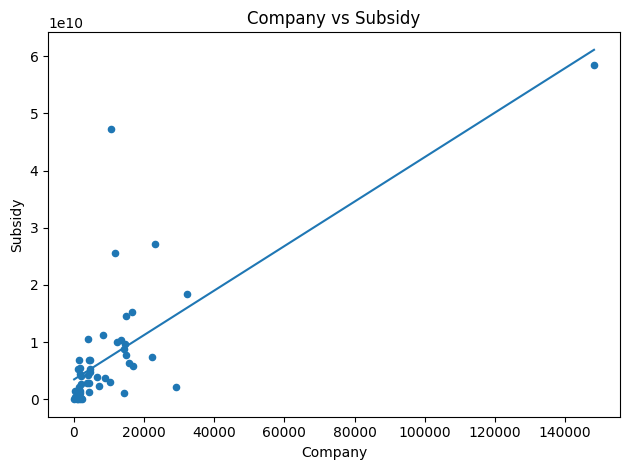

In [ ]:
df.plot.scatter(x = "Company", y = "Subsidy")
plt.title("Company vs Subsidy")
slope, intercept = np.polyfit(df.Company, df.Subsidy, 1)
x = np.array([df.Company.min(), df.Company.max()])
y =  slope * x + intercept
_ = plt.plot(x,y)
_ = plt.tight_layout()
_ = plt.margins(0.05)


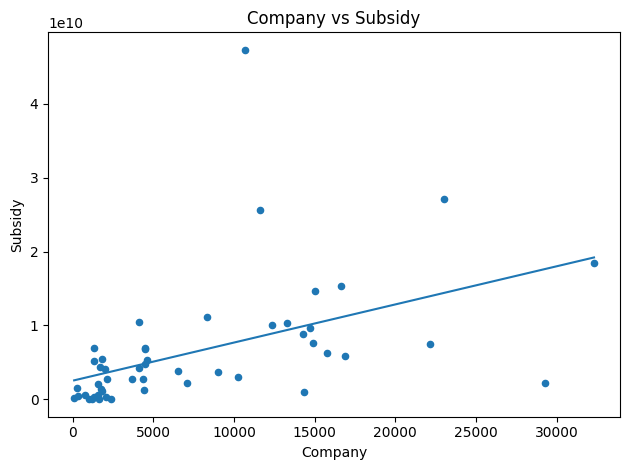

In [ ]:
#Count without new york
df2 = df[df.index != 'NY']
df2.plot.scatter(x = "Company", y = "Subsidy")
plt.title("Company vs Subsidy")
slope, intercept = np.polyfit(df2.Company, df2.Subsidy, 1)
x = np.array([df2.Company.min(), df2.Company.max()])
y =  slope * x + intercept
_ = plt.plot(x,y)
_ = plt.tight_layout()
_ = plt.margins(0.05)

#2.5 State & Subsidy

In [ ]:
import pandas as pd
# Assuming dec_basic_df is your DataFrame
dec_basic_df["subsidy_level"] = dec_basic_df["subsidy_level"].replace({"State": "state", "Local": "local"})

#s6 will have the merged categories
s6 = dec_basic_df["subsidy_level"].value_counts()
print(s6)


state       359385
local       173724
federal     140931
multiple       277
Name: subsidy_level, dtype: int64


In [ ]:
s7 = dec_basic_df.groupby("subsidy_level")["subsidy"].sum().astype(int)
s7

subsidy_level
federal      80224972294
local        86671303556
multiple     82799249554
state       213630151014
Name: subsidy, dtype: int64

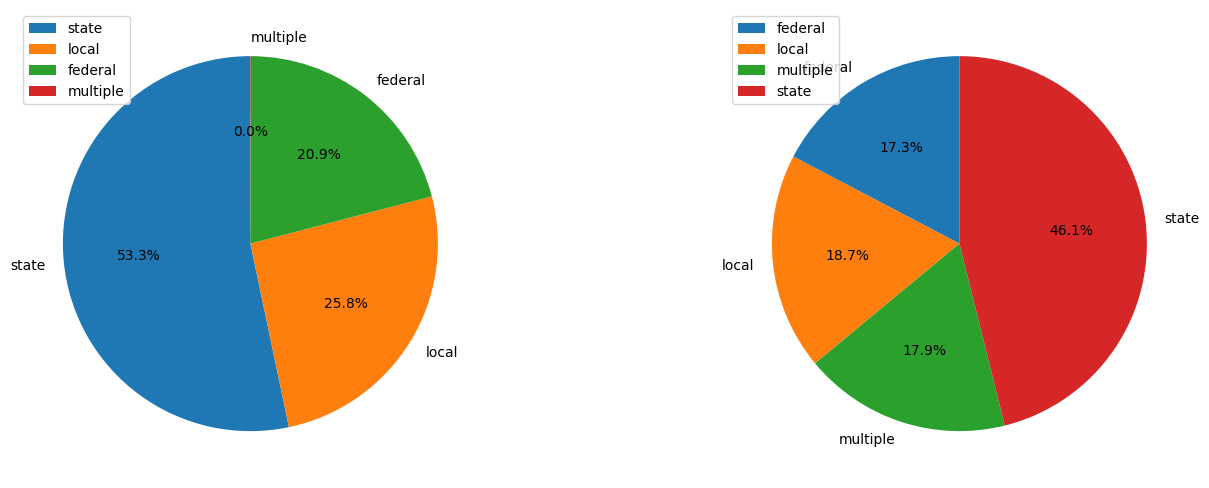

In [ ]:
plt.subplot(1,2,1)
plt.pie(s6, autopct = '%1.1f%%',labels = s6.index, startangle = 90)
plt.tight_layout()
plt.margins(0.05)
plt.legend(loc = "upper left")
plt.subplot(1,2,2)
plt.pie(s7, autopct = "%1.1f%%",labels = s7.index, startangle = 90)
plt.legend(loc = "upper left")
plt.tight_layout()
plt.margins(0.05)
fig = plt.gcf()
fig.set_size_inches(15, 5)

#2.6 Industry & Subsidy

In [ ]:
s8 = dec_basic_df.groupby("major_industry")["subsidy"].sum().sort_values(ascending = False).astype(int).head(15)
s8

major_industry
motor vehicles                         44028384310
utilities and power generation         40899642099
electrical and electronic equipment    37658328028
aerospace and military contracting     23686072488
oil and gas                            21855397206
diversified                            18393636037
chemicals                              15758215059
financial services                     14975991930
retailing                              11257876210
information technology                 10597506196
metals                                 10086429739
real estate                             9262325954
automotive parts                        6033024539
airlines                                5790308735
healthcare services                     4798186585
Name: subsidy, dtype: int64

Text(0.5, 1.0, 'Subsidy Amount by Category')

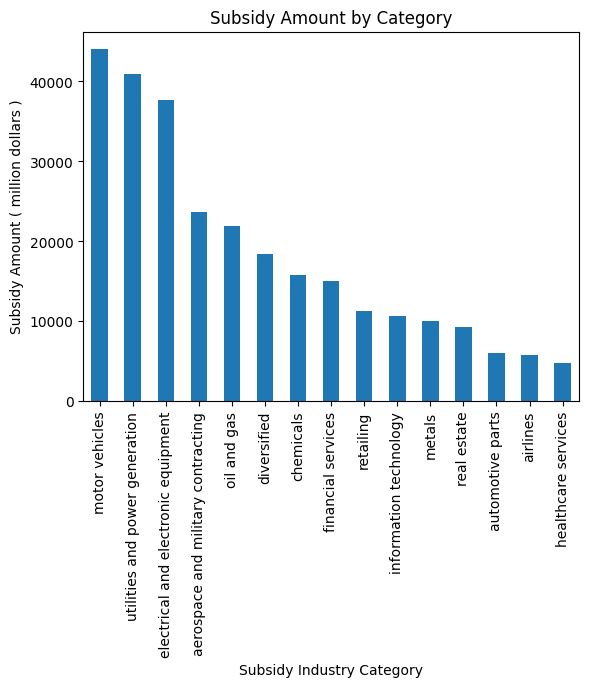

In [ ]:
s9 = s8 / 1000000
s9.plot.bar()
plt.xlabel("Subsidy Industry Category")
plt.ylabel("Subsidy Amount ( million dollars )")
plt.title("Subsidy Amount by Category")